# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
print(weather_api_key)

89e758549cffc42aef01c1c833e7e861


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_long = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1000)
long = np.random.uniform(long_range[0], long_range[1], size=1000)
lat_long = zip(lat, long)

# Identify nearest city for each lat, lng combination
for l in lat_long:
    city = citipy.nearest_city(l[0], l[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 472


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"

city_url = f"{url}APPID={weather_api_key}&units={units}&q="

print(requests.get(city_url))

<Response [400]>


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# # Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"

# Create endpoint URL with each city
city_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
cities_name = []
city_data = []
city_lat = []
city_long = []
city_maxtemp = []
city_humidity = []
city_clouds = []
city_winds = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
        
     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather = requests.get(city_url + city).json()
        cities_name.append(city_weather['name'])
        city_lat.append(city_weather['coord']['lat'])
        city_long.append(city_weather['coord']['lon'])
        city_maxtemp.append(city_weather['main']['temp_max'])
        city_humidity.append(city_weather['main']['humidity'])
        city_clouds.append(city_weather['clouds']['all'])
        city_winds.append(city_weather['wind']['speed'])
        city_country.append(city_weather['sys']['country'])
        city_date.append(city_weather['dt'])

        
        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | okhotsk
Processing Record 2 of Set 1 | peniche
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | svetlogorsk
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | benguela
Processing Record 10 of Set 1 | hacari
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | nguiu
City not found. Skipping...
Processing Record 14 of Set 1 | eyl
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | kupang
Processing Record 17 of Set 1 | shangrao
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | husavik
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | naze
P

Processing Record 37 of Set 4 | litovko
Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | mocuba
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | hirara
Processing Record 42 of Set 4 | ballina
Processing Record 43 of Set 4 | sambava
Processing Record 44 of Set 4 | comodoro rivadavia
Processing Record 45 of Set 4 | gat
Processing Record 46 of Set 4 | pasni
Processing Record 47 of Set 4 | hualmay
Processing Record 48 of Set 4 | bismarck
Processing Record 49 of Set 4 | ratnagiri
Processing Record 0 of Set 5 | chuy
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | sur
Processing Record 3 of Set 5 | lorengau
Processing Record 4 of Set 5 | pingzhuang
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | zhigansk
Processing Record 8 of Set 5 | saint-joseph
Processing Record 9 of Set 5 | halalo
C

Processing Record 24 of Set 8 | havre-saint-pierre
Processing Record 25 of Set 8 | poum
Processing Record 26 of Set 8 | pisco
Processing Record 27 of Set 8 | biltine
Processing Record 28 of Set 8 | san pedro
Processing Record 29 of Set 8 | caceres
Processing Record 30 of Set 8 | maningrida
Processing Record 31 of Set 8 | ostroleka
Processing Record 32 of Set 8 | alyangula
Processing Record 33 of Set 8 | saint george
Processing Record 34 of Set 8 | semey
Processing Record 35 of Set 8 | meyungs
City not found. Skipping...
Processing Record 36 of Set 8 | mayo
Processing Record 37 of Set 8 | broome
Processing Record 38 of Set 8 | urengoy
Processing Record 39 of Set 8 | amli
Processing Record 40 of Set 8 | tavrichanka
Processing Record 41 of Set 8 | gizo
Processing Record 42 of Set 8 | provideniya
Processing Record 43 of Set 8 | faanui
Processing Record 44 of Set 8 | djambala
Processing Record 45 of Set 8 | cheyenne
Processing Record 46 of Set 8 | matara
Processing Record 47 of Set 8 | aswa

In [6]:
response = requests.get(url)
response

<Response [401]>

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data = ({"City": city, "Lat": city_lat, "Lng": city_long, "Max Temp": city_maxtemp,
              "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_winds,
              "Country": city_country, "Date": city_date})

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          430
Lat           430
Lng           430
Max Temp      430
Humidity      430
Cloudiness    430
Wind Speed    430
Country       430
Date          430
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangai,59.3833,143.3000,15.89,76,27,3.10,RU,1687913009
1,pangai,39.3558,-9.3811,20.72,93,1,7.96,PT,1687913148
2,pangai,-53.1500,-70.9167,0.62,100,100,4.15,CL,1687912502
3,pangai,-23.1203,-134.9692,23.40,76,12,5.78,PF,1687912587
4,pangai,52.6333,29.7333,12.08,95,100,2.32,BY,1687913149


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangai,59.3833,143.3000,15.89,76,27,3.10,RU,1687913009
1,pangai,39.3558,-9.3811,20.72,93,1,7.96,PT,1687913148
2,pangai,-53.1500,-70.9167,0.62,100,100,4.15,CL,1687912502
3,pangai,-23.1203,-134.9692,23.40,76,12,5.78,PF,1687912587
4,pangai,52.6333,29.7333,12.08,95,100,2.32,BY,1687913149


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

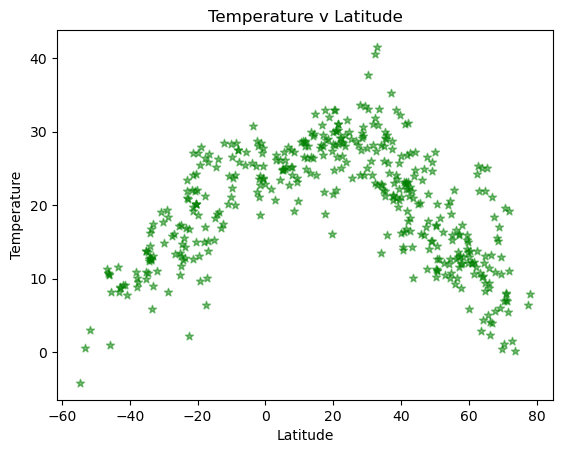

In [11]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt. scatter(latitude, temp, marker = '*', color = 'green', alpha = .50)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature v Latitude")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

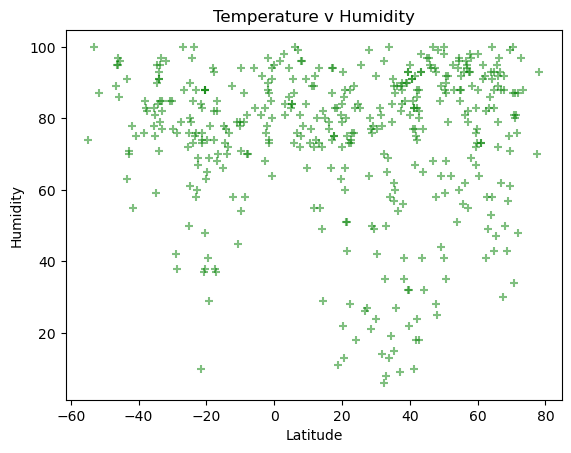

In [12]:
# Build the scatter plots for latitude vs. humidity
temp = city_data_df["Humidity"]

# Incorporate the other graph properties
plt. scatter(latitude, temp, marker = '+', color = 'g', alpha = .50)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Temperature v Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

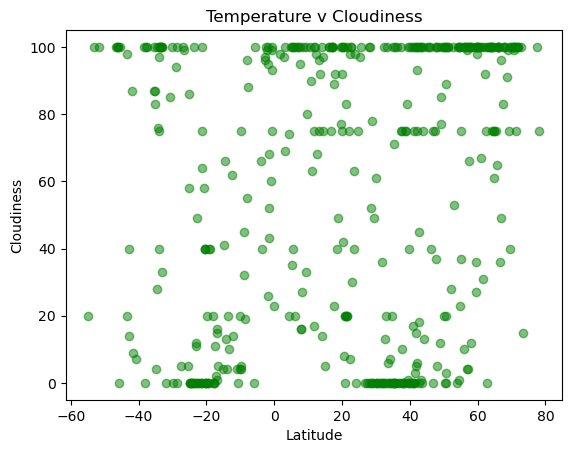

In [13]:
# Build the scatter plots for latitude vs. cloudiness
temp = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt. scatter(latitude, temp, marker = 'o', color = 'g', alpha = .50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Temperature v Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

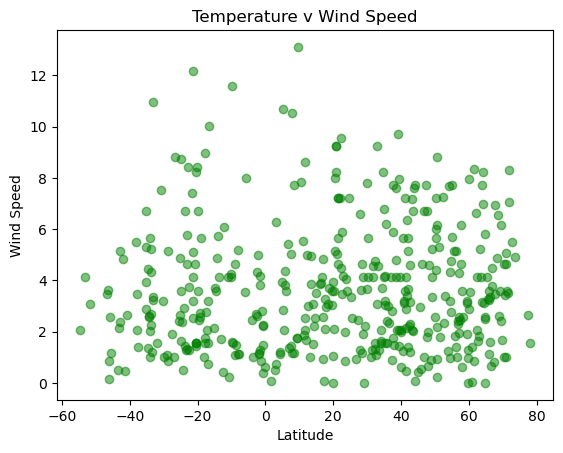

In [14]:
# Build the scatter plots for latitude vs. wind speed
temp = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt. scatter(latitude, temp, marker = 'o', color = 'g', alpha = .50)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Temperature v Wind Speed")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] >= 0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangai,59.3833,143.3000,15.89,76,27,3.10,RU,1687913009
1,pangai,39.3558,-9.3811,20.72,93,1,7.96,PT,1687913148
4,pangai,52.6333,29.7333,12.08,95,100,2.32,BY,1687913149
8,pangai,8.3233,-73.1489,19.19,96,27,1.18,CO,1687913149
11,pangai,7.9803,49.8164,25.21,75,16,10.52,SO,1687913056


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] < 0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,pangai,-53.1500,-70.9167,0.62,100,100,4.15,CL,1687912502
3,pangai,-23.1203,-134.9692,23.40,76,12,5.78,PF,1687912587
5,pangai,-38.2667,141.9667,10.91,76,100,5.51,AU,1687912656
6,pangai,-24.7911,-50.0119,11.75,90,0,1.63,BR,1687912623
7,pangai,-12.5763,13.4055,17.45,89,62,0.42,AO,1687913149


###  Temperature vs. Latitude Linear Regression Plot

y = -0.31x +33.02
The r-value is: 0.5462946587894394


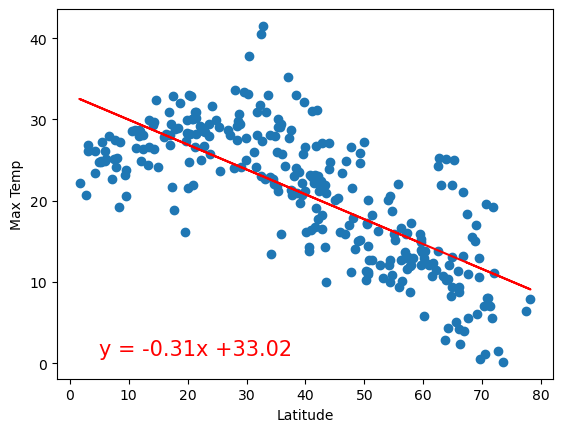

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5,1),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.43x +26.98
The r-value is: 0.6444787270739015


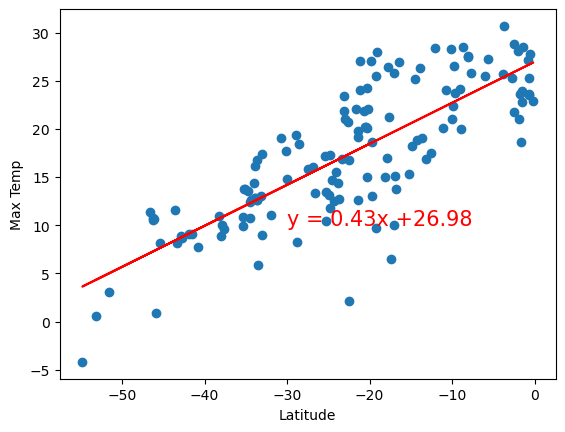

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq2,(-30,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Not surprisingly, there is a clear and major increase in temprature the close you get to the equator. The year round direct sunlight keeps it nice and warm.

### Humidity vs. Latitude Linear Regression Plot

y = 0.07x +70.25
The r-value is: 0.003465749494622011


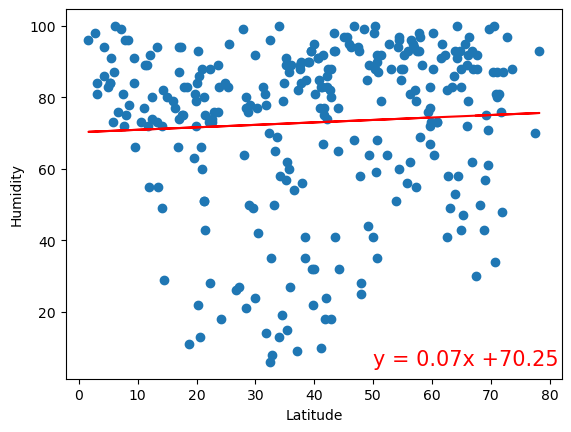

In [20]:
# Northern Hemisphere
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq2,(50,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.14x +73.52
The r-value is: 0.01274609880848589


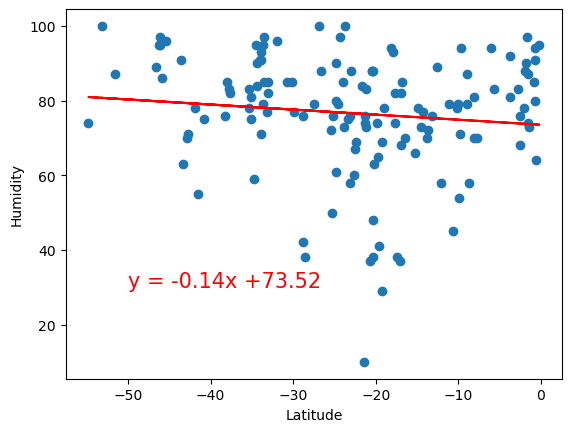

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq2,(-50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

It does not seem like distance from the equator greatly effects the humidity of the air. There is a slight rise the closer you get to the poles.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.32x +49.52
The r-value is: 0.023070341158484962


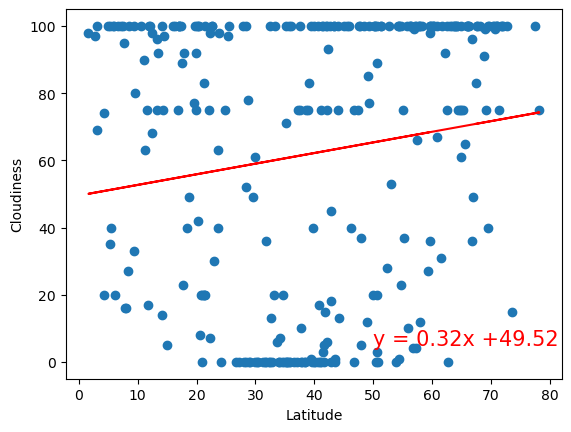

In [22]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq2,(50,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.46x +36.07
The r-value is: 0.02253354284012973


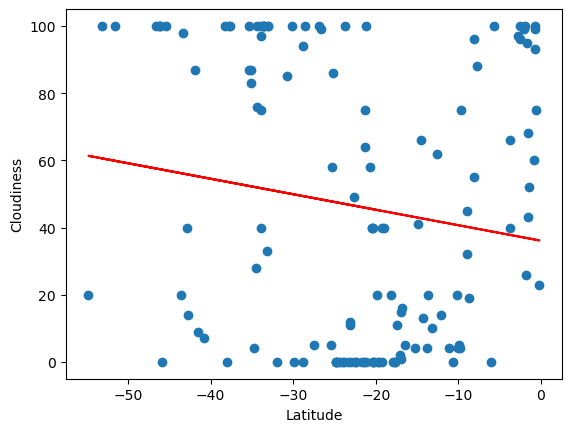

In [23]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq2,(50,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There is a definite correlation between cloudiness and distance from the equator. While it is not an extreme difference there is a clear increase in the occurence of clouds the further from the equator you get.

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.0x +3.87
The r-value is: 0.0009290449269475444


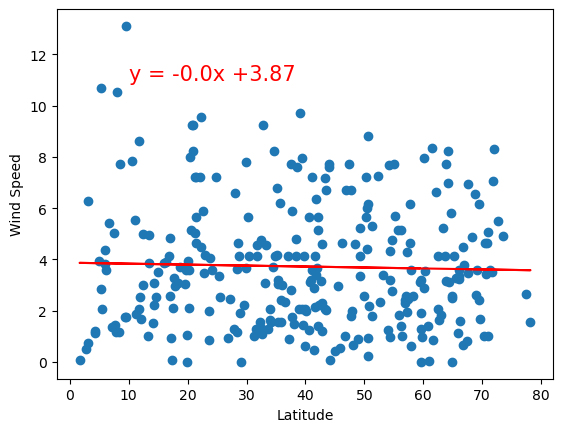

In [24]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq2,(10,11),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

y = -0.0x +3.33
The r-value is: 9.571681148771409e-05


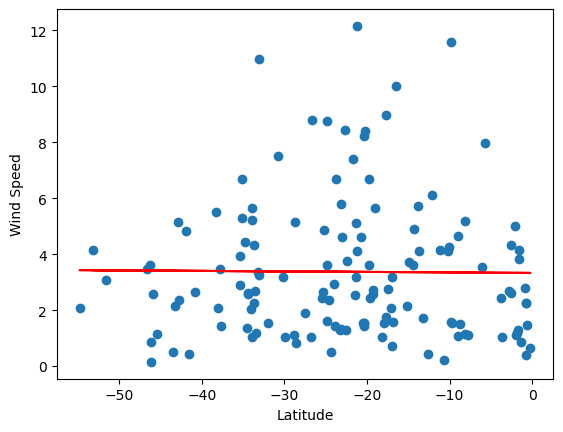

In [25]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq2)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq2,(10,11),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE